# Sentiment Analysis


---

With the rise of online social media platforms like Twitter, Facebook and Reddit, and the proliferation of customer reviews on sites like Amazon and Yelp, we now have access, more than ever before, to massive text-based data sets! They can be analyzed in order to determine how large portions of the population feel about certain products, events, etc. This sort of analysis is called _sentiment analysis_. In this notebook I will build an end-to-end sentiment classification system from scratch.



> **Note**: Code and Markdown cells can be executed using the **Shift+Enter** keyboard shortcut. In addition, a cell can be edited by typically clicking it (double-click for Markdown cells) or by pressing **Enter** while it is highlighted.

## Step 1: Exploring the data!

The dataset we are going to use is very popular among researchers in Natural Language Processing, usually referred to as the [IMDb dataset](http://ai.stanford.edu/~amaas/data/sentiment/). It consists of movie reviews from the website [imdb.com](http://www.imdb.com/), each labeled as either '**pos**itive', if the reviewer enjoyed the film, or '**neg**ative' otherwise.

> Maas, Andrew L., et al. [Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/). In _Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies_. Association for Computational Linguistics, 2011.

We have provided the dataset for you. You can load it in by executing the Python cell below.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob
# Installing wordcloud
# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from sklearn.utils import shuffle



In [4]:
def read_imdb_data(data_dir='data/imdb-reviews'):
    """Read IMDb movie reviews from given directory.
    
    Directory structure expected:
    - data/
        - train/
            - pos/
            - neg/
        - test/
            - pos/
            - neg/
    
    """

    # Data, labels to be returned in nested dicts matching the dir. structure
    data = {}
    labels = {}

    # Assume 2 sub-directories: train, test
    for data_type in ['train', 'test']:
        data[data_type] = {}
        labels[data_type] = {}

        # Assume 2 sub-directories for sentiment (label): pos, neg
        for sentiment in ['pos', 'neg']:
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []
            
            # Fetch list of files for this sentiment
            path = os.path.join(data_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)
            
            # Read reviews data and assign labels
            for f in files:
                with open(f) as review:
                    data[data_type][sentiment].append(review.read())
                    labels[data_type][sentiment].append(sentiment)
            
            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)
    
    # Return data, labels as nested dicts
    return data, labels


data, labels = read_imdb_data()
print("IMDb reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
        len(data['train']['pos']), len(data['train']['neg']),
        len(data['test']['pos']), len(data['test']['neg'])))

IMDb reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


Now that the data is loaded in, let's take a quick look at one of the positive reviews:

In [5]:
print(data['train']['pos'][2])

The story of this film is truly remarkable. A virus cut loose and only 1% of the human race survived. The only thing we know now is that animals rule the land above and there are posters everywhere that say, "The Twelve Monkeys did it." Thats right, the human race had to hide underground from the sickness that had killed over 500 Billion people. Apparently animals do not contract this disease. Day by day the present scientist try to discover what type of sickness had caused this; how it was created; if nature did it or a mere human being had created it. All they know is that there is are a bunch of animals running around a city above them, the deaths began during 1996-1997, and twelve monkeys have something to do with it. (Or at least thats what the poster says.) So a current convict named James Cole (Bruce Willis) is sent as a "volunteer" to get some samples from above. After he does his "volunteer" work, he is asked to be sent back in time to the year 1996 to figure out what happened

And one with a negative sentiment:

In [6]:
print(data['train']['neg'][2])

An Avent-garde nightmarish, extremely low-budget "film" that has delusions of grandeur. Hard to sit through. I get the message that child abuse is wrong. Wow big revelation. I had no clue it was wrong before viewing this. Yes that's sarcasm. DON'T watch this "film" if you're offended by nudity of either the male or female gender. DON'T watch it if you're the least bit squeamish. DON'T watch it if you care about acting. On second thought just DON'T watch it period.<br /><br />My grade: D-<br /><br />DVD Extras:making the movie , the premiere,interview with Kristie Bowersock, deleted scenes, movie stills, Director's commentary, 2 versions of the teaser trailer, music video by The Azoic, & a classroom video experiment


We can also make a wordcloud visualization of the reviews.

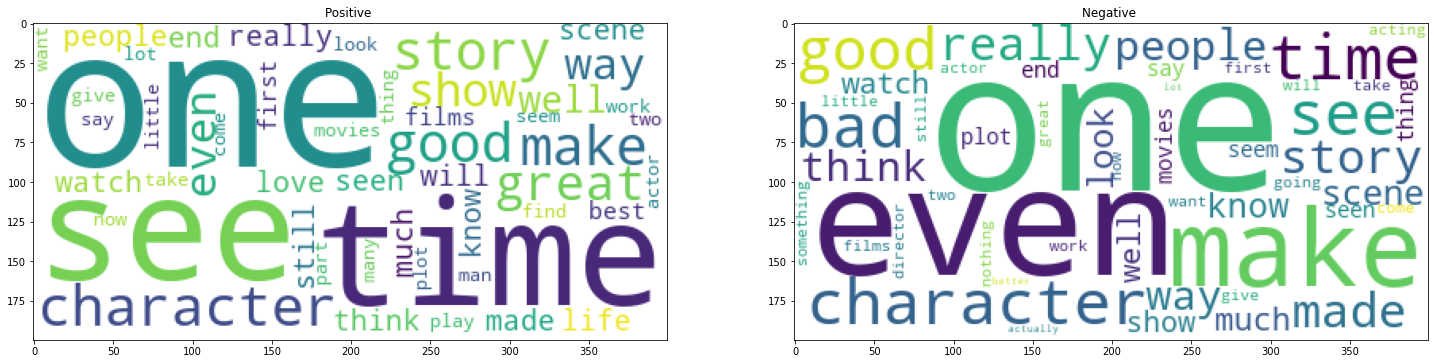

In [7]:
def visualize_word_cloud(positive, negative):
    
    # Combine all reviews for the desired sentiment
    pos_combined_text = " ".join([review for review in positive])

    # Initialize wordcloud object
    pos_wc = WordCloud(background_color='white', max_words=50,
            # update stopwords to include common words like film and movie
            stopwords = STOPWORDS.update(['br','film','movie']))

    # Combine all reviews for the desired sentiment
    neg_combined_text = " ".join([review for review in negative])

    # Initialize wordcloud object
    neg_wc = WordCloud(background_color='white', max_words=50,
            # update stopwords to include common words like film and movie
            stopwords = STOPWORDS.update(['br','film','movie']))
    
    fig = plt.figure(figsize=(25,25))

    plt.subplot(1,2,1)
    # Generate and plot wordcloud
    plt.imshow(pos_wc.generate(pos_combined_text))
    plt.title("Positive ")


    plt.subplot(1,2,2)
    # Generate and plot wordcloud
    plt.imshow(neg_wc.generate(neg_combined_text)) 
    plt.title("Negative ")

visualize_word_cloud(data["train"]["pos"], data["train"]["neg"])

###  Form training and test sets

Now that you've seen what the raw data looks like, combine the positive and negative documents to get one unified training set and one unified test set.

In [8]:

def prepare_imdb_data(data, labels):
    """Prepare training and test sets from IMDb movie reviews."""
    

    
    # Combine positive and negative reviews and labels
    data_train = data['train']['pos'] + data['train']['neg']
    data_test = data['test']['pos'] + data['test']['neg']
    labels_train = labels['train']['pos'] + labels['train']['neg']
    labels_test = labels['test']['pos'] + labels['test']['neg']
    
    # TODO: Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train)
    data_test, labels_test = shuffle(data_test, labels_test)
    

    # Return a unified training data, test data, training labels, test labets
    
    return data_train, data_test, labels_train, labels_test


data_train, data_test, labels_train, labels_test = prepare_imdb_data(data, labels)
print("IMDb reviews (combined): train = {}, test = {}".format(len(data_train), len(data_test)))

IMDb reviews (combined): train = 25000, test = 25000


## Step 2. Preprocessing

As you might have noticed in the sample reviews, our raw data includes HTML. Therefore there are HTML tags that need to be removed. We also need to remove non-letter characters, normalize uppercase letters by converting them to lowercase, tokenize, remove stop words, and stem the remaining words in each document.



In [9]:
# BeautifulSoup to easily remove HTML tags
from bs4 import BeautifulSoup 

# RegEx for removing non-letter characters
import re

# NLTK library for the remaining steps
import nltk
nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
nltk.download('punkt')
from nltk.corpus import stopwords # import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem.porter import *

[nltk_data] Downloading package stopwords to /home/rima/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/rima/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
def review_to_words(review):
    """Convert a raw review string into a sequence of words."""
    
    # TODO: Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem
    text = BeautifulSoup(review, "html5lib").get_text()
    text = re.sub(r"[^a-zA-Z0-9]"," ", text.lower())
    words = word_tokenize(text)
    words = [w for w in words if w not in stopwords.words("english")]    # Remove stop words
    words = [PorterStemmer().stem(w) for w in words]
    

    # Return final list of words
    return words


review_to_words("""This is just a <em>test</em>.<br/><br />
But if it wasn't a test, it would make for a <b>Great</b> movie review!""")

['test', 'test', 'would', 'make', 'great', 'movi', 'review']

With the function `review_to_words()` fully implemeneted, we can apply it to all reviews in both training and test datasets. This may take a while, so let's build in a mechanism to write to a cache file and retrieve from it later.

In [11]:
import pickle

cache_dir = os.path.join("cache", "sentiment_analysis")  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

def preprocess_data(data_train, data_test, labels_train, labels_test,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""

    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        words_train = list(map(review_to_words, data_train))
        words_test = list(map(review_to_words, data_test))
        
        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])
    
    return words_train, words_test, labels_train, labels_test


# Preprocess data
words_train, words_test, labels_train, labels_test = preprocess_data(
        data_train, data_test, labels_train, labels_test)

# Take a look at a sample
print("\n--- Raw review ---")
print(data_train[1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])

Wrote preprocessed data to cache file: preprocessed_data.pkl

--- Raw review ---
I wouldn't be surprised if Soderbergh was pressured to avoid making pre- revolution Cuba as graphically corrupt as it was. Merely reciting a few statistics isn't going to make it with the younger crowd. Still, part one, which is almost entirely shot in the jungle, does capture the feel of that place, especially when traversing the mountainous areas of Cuba. I liked Del Toro's interpretation of Che Guevara's personality. And the actor who plays Castro, Bichir, also did a great job, against all odds. It's clear Soderbergh doesn't look down on these people, but it's also clear he's not going to plea their case to 'yanquis' far removed from the recent past. Some of the more important historical aspects contradict what I've read. To my knowledge Castro did not court the Soviet Union until all attempts to gain acceptance from the United States were exhausted. But on other aspects he is right on, especially as to

## Step 3: Extracting Bag-of-Words features

Now that each document has been preprocessed, we can transform each into a Bag-of-Words feature representation. Note that we need to create this transformation based on the training data alone, as we are not allowed to peek at the testing data at all!

The dictionary or _vocabulary_ $V$ (set of words shared by documents in the training set) used here will be the one on which we train our supervised learning algorithm. Any future test data must be transformed in the same way for us to be able to apply the learned model for prediction. Hence, it is important to store the transformation / vocabulary as well.

> **Note**: The set of words in the training set may not be exactly the same as the test set. What do you do if you encounter a word during testing that you haven't seen before? Unfortunately, we'll have to ignore it, or replace it with a special `<UNK>` token.

### Compute Bag-of-Words features

I implement the `extract_BoW_features()` function, apply it to both training and test datasets, and store the results in `features_train` and `features_test` NumPy arrays, respectively. I choose a reasonable vocabulary size, say $|V| = 5000$, and  I keep only the top $|V|$ occuring words and discard the rest. This number will also serve as the number of columns in the BoW matrices.

> **Hint**:  it useful to take advantage of `CountVectorizer` from scikit-learn. I pickle the Bag-of-Words transformation so that I can use it in future.

In [16]:
import numpy as np
import joblib
from sklearn.feature_extraction.text import CountVectorizer
#import sklearn.externals.joblib as joblib
# joblib is an enhanced version of pickle that is more efficient for storing NumPy arrays


def extract_BoW_features(words_train, words_test, vocabulary_size=5000,
                         cache_dir=cache_dir, cache_file="bow_features.pkl"):
    """Extract Bag-of-Words for a given set of documents, already preprocessed into words."""
    
    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = joblib.load(f)
            print("Read features from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Fit a vectorizer to training documents and use it to transform them
        # NOTE: Training documents have already been preprocessed and tokenized into words;
        #       pass in dummy functions to skip those steps, e.g. preprocessor=lambda x: x
        vectorizer = CountVectorizer( preprocessor=lambda x: x, tokenizer=lambda x: x, lowercase=False, max_features=5000)
        vectorizer.fit(words_train)
        features_train = vectorizer.transform(words_train)

        # Apply the same vectorizer to transform the test documents (ignore unknown words)
        features_test = vectorizer.transform(words_test)
        
        # to convert the features using .toarray() for a compact representation
        features_train = features_train.toarray()
        features_test = features_test.toarray()

        # Write to cache file for future runs (store vocabulary as well)
        if cache_file is not None:
            vocabulary = vectorizer.vocabulary_
            cache_data = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                joblib.dump(cache_data, f)
            print("Wrote features to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        features_train, features_test, vocabulary = (cache_data['features_train'],
                cache_data['features_test'], cache_data['vocabulary'])
    
    # Return both the extracted features as well as the vocabulary
    return features_train, features_test, vocabulary


# Extract Bag of Words features for both training and test datasets
features_train, features_test, vocabulary = extract_BoW_features(words_train, words_test)

# Inspect the vocabulary that was computed
print("Vocabulary: {} words".format(len(vocabulary)))

import random
print("Sample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

# Sample
print("\n--- Preprocessed words ---")
print(words_train[5])
print("\n--- Bag-of-Words features ---")
print(features_train[5])
print("\n--- Label ---")
print(labels_train[5])

/home/rima/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Wrote features to cache file: bow_features.pkl
Vocabulary: 5000 words
Sample words: ['showcas', 'subsequ', 'satisfi', 'round', 'vacat', 'schlock', 'horrid', 'rap']

--- Preprocessed words ---
['hey', 'truli', 'theatrex', 'found', 'grub', 'video', 'flea', 'market', 'almost', 'new', 'condit', 'read', 'back', 'box', 'saw', 'somewhat', 'cult', 'hit', 'cours', 'came', 'home', 'strang', 'film', 'aunt', 'cousin', 'former', 'first', 'ladi', 'jacquelin', 'bouvier', 'kennedi', 'onassi', 'live', 'decay', '28', 'room', 'hous', 'long', 'island', 'suffolk', 'co', 'share', 'hous', 'raccoon', 'cat', 'flea', 'eyow', 'know', 'els', 'suffolk', 'co', 'one', 'point', 'live', 'filth', 'old', 'jacki', 'came', 'set', 'thing', 'right', 'anyway', 'one', 'strang', 'pair', 'big', 'edi', 'littl', 'edi', 'edi', 'daughter', 'alway', 'wear', 'someth', 'head', 'danc', 'sing', 'give', 'littl', 'asid', 'camera', 'rare', 'make', 'much', 'sens', 'big', 'edi', 'mother', 'age', '79', 'appar', 'like', 'run', 'around', 'nake'

Let's try to visualize the Bag-of-Words feature vector for one of our training documents.

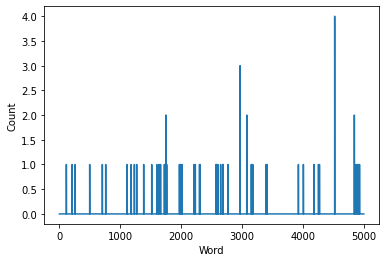

In [17]:
# Plot the BoW feature vector for a training document
plt.plot(features_train[15,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

#### Question: Reflecting on Bag-of-Words feature representation

What is the average sparsity level of BoW vectors in our training set? In other words, on average what percentage of entries in a BoW feature vector are zero?

#### Answer:


In [18]:
non_zero_percentage = np.count_nonzero(features_train) / features_train.size
zero_percentage  = np.count_nonzero(features_train ==0)/ features_train.size
print("The average sparsity level of BoW vectors {} and the not sparsity level {}".format(zero_percentage, non_zero_percentage))

The average sparsity level of BoW vectors 0.983091024 and the not sparsity level 0.016908976




### Zipf's law

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), named after the famous American linguist George Zipf, is an empirical law stating that given a large collection of documents, the frequency of any word is inversely proportional to its rank in the frequency table. So the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, and so on. In the figure below we plot number of appearances of each word in our training set against its rank.

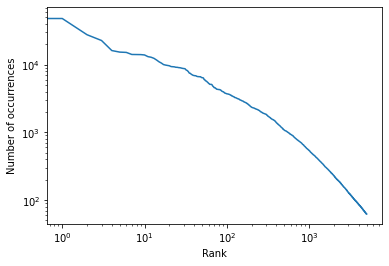

In [19]:
# Find number of occurrences for each word in the training set
word_freq = features_train.sum(axis=0)

# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot 
plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

#### Question: Zipf's law

What is the total number of occurrences of the most frequent word? What is the the total number of occurrences of the second most frequent word? Do your numbers follow  Zipf's law? If not, why?

#### Answer:

...

### Normalize feature vectors

Bag-of-Words features are intuitive to understand as they are simply word counts. But counts can vary a lot, and potentially throw off learning algorithms later in the pipeline. So, before we proceed further, let's normalize the BoW feature vectors to have unit length.

This makes sure that each document's representation retains the unique mixture of feature components, but prevents documents with large word counts from dominating those with fewer words.

In [20]:
import sklearn.preprocessing as pr


# Normalize BoW features in training and test set
features_train = pr.normalize(features_train, norm="l2", copy=False)
features_test = pr.normalize(features_test, norm="l2", copy=False)


## Step 4: Classification using BoW features

Now that the data has all been properly transformed, we can feed it into a classifier. To get a baseline model, we train a Naive Bayes classifier from scikit-learn (specifically, [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)), and evaluate its accuracy on the test set.

In [21]:
from sklearn.naive_bayes import GaussianNB

#  Train a Guassian Naive Bayes classifier
clf1 = GaussianNB().fit(features_train, labels_train)

# Calculate the mean accuracy score on training and test sets
print("[{}] Accuracy: train = {}, test = {}".format(
        clf1.__class__.__name__,
        clf1.score(features_train, labels_train),
        clf1.score(features_test, labels_test)))

[GaussianNB] Accuracy: train = 0.81916, test = 0.72704


Tree-based algorithms often work quite well on Bag-of-Words as their highly discontinuous and sparse nature is nicely matched by the structure of trees. As the next task, I will try to improve on the Naive Bayes classifier's performance by using scikit-learn's Gradient-Boosted Decision Tree classifer.

###  Gradient-Boosted Decision Tree classifier

Use [`GradientBoostingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) from scikit-learn to classify the BoW data. This model has a number of parameters. We use default parameters for some of them and pre-set the rest for you, except one: `n_estimators`. Find a proper value for this hyperparameter, use it to classify the data, and report how much improvement you get over Naive Bayes in terms of accuracy.

> **Tip**: Use a model selection technique such as cross-validation, grid-search, or an information criterion method, to find an optimal value for the hyperparameter.

In [26]:
range(20, 81, 10)

range(20, 81, 10)

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


def classify_gboost(X_train, X_test, y_train, y_test, n_estimators = range(20,80,10)):        
    # Initialize classifier
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1, random_state=0)

    # Classify the data using GradientBoostingClassifier
    greed_search = GridSearchCV(estimator=clf, param_grid={"n_estimators":n_estimators}, verbose=10, n_jobs=16)
    
    # Perform hyperparameter tuning / model selection
    greed_search.fit(X_train, y_train)
    
    #  Print final training & test accuracy
    clf2 = greed_search.best_estimator_
    print(greed_search.best_params_)
    print("[{}] Accuracy: train = {}, test = {}".format(
            clf2.__class__.__name__,
            clf2.score(X_train, y_train),
            clf2.score(X_test, y_test)))
    
    # Return best classifier model
    return clf2


clf2 = classify_gboost(features_train, features_test, labels_train, labels_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_estimators': 70}
[GradientBoostingClassifier] Accuracy: train = 0.83288, test = 0.82364


###  Adverserial testing

Write a short movie review to trick your machine learning model! That is, a movie review with a clear positive or negative sentiment that your model will classify incorrectly.

> **Hint**: You might want to take advantage of the biggest weakness of the Bag-of-Words scheme!

In [121]:
#  Write a sample review and set its true sentiment
my_reviews = ["I expected this movie to be much better ", "This movie was much better than I expected "]
true_sentiments = ['neg' ,'pos' ] # sentiment must be 'pos' or 'neg'

for my_review, true_sentiment in zip(my_reviews, true_sentiments):
    
    #  Apply the same preprocessing and vectorizing steps as you did for your training data
    my_words = review_to_words(my_review)
    vectorizer = CountVectorizer( preprocessor=lambda x: x, tokenizer=lambda x: x, lowercase=False,   vocabulary=vocabulary)
    my_bow_features = vectorizer.transform([my_words]).toarray()
    my_bow_features = pr.normalize(my_bow_features, norm="l2", copy=False)

    # Then call your classifier to label it

    predicted_sentiment = clf2.predict(my_bow_features)[0]
    print("--- My review ---")
    print(my_review)
    print("\n--- Preprocessed words ---")
    print(my_words)
    print("\nTrue sentiment: {}, predicted sentiment: {}".format(true_sentiment, predicted_sentiment))
    print("----------------------------------------------------------------------------------")


--- My review ---
I expected this movie to be much better 

--- Preprocessed words ---
['expect', 'movi', 'much', 'better']

True sentiment: neg, predicted sentiment: pos
----------------------------------------------------------------------------------
--- My review ---
This movie was much better than I expected 

--- Preprocessed words ---
['movi', 'much', 'better', 'expect']

True sentiment: pos, predicted sentiment: pos
----------------------------------------------------------------------------------


In [123]:
vocabulary_tokens = list()
for ind in np.where(my_bow_features!=0)[1]:
    vocabulary_tokens.append(list(vocabulary.keys())[list(vocabulary.values()).index(ind)])
    
print("Tokens in the text are {} \n  \n The token in the vocabulary are {} ".format(my_words, vocabulary_tokens))


Tokens in the text are ['movi', 'much', 'better', 'expect'] 
  
 The token in the vocabulary are ['better', 'expect', 'movi', 'much'] 
